<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reologia" data-toc-modified-id="Reologia-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reologia</a></span><ul class="toc-item"><li><span><a href="#Fluídos-Newtonianos" data-toc-modified-id="Fluídos-Newtonianos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fluídos Newtonianos</a></span></li><li><span><a href="#CF-de-MG---Carreau" data-toc-modified-id="CF-de-MG---Carreau-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CF de MG - Carreau</a></span></li></ul></li><li><span><a href="#Reologia-oscilatória" data-toc-modified-id="Reologia-oscilatória-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reologia oscilatória</a></span><ul class="toc-item"><li><span><a href="#Definição-dos-modelos" data-toc-modified-id="Definição-dos-modelos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definição dos modelos</a></span></li><li><span><a href="#Plots-comparativos" data-toc-modified-id="Plots-comparativos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plots comparativos</a></span></li></ul></li></ul></div>

In [1]:
import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps, quad

# Reologia
## Fluídos Newtonianos

C:\Users\Karl\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


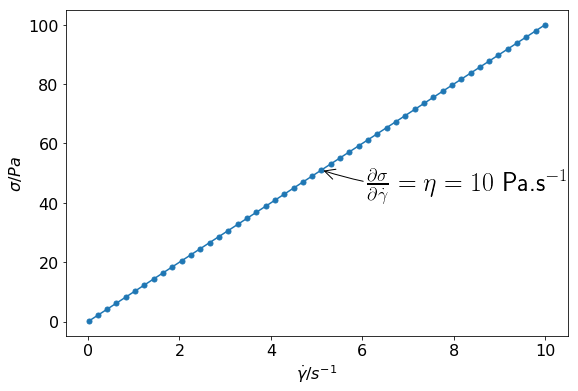

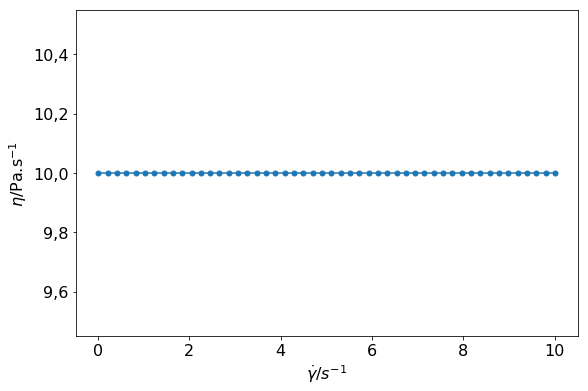

In [26]:
mpl.rcParams.update({'font.size': 16, 'text.usetex':False, 'text.latex.unicode':True})
visc = 10   # Pa.s
taxa_cis = np.linspace(0.01, 10)  # s-1
tensao = visc * taxa_cis  # Pa

fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))
fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))

ax1.plot(taxa_cis, tensao, marker='o', markersize=5)
ax2.plot(taxa_cis, [visc] * len(taxa_cis), marker='o', markersize=5)

ax1.set(xlabel=r'$\dot{\gamma}/s^{-1}$', ylabel=r'$\sigma/Pa$')
ax1.annotate(text=r'$\frac{\partial \sigma}{\partial \dot{\gamma}}$ $=\eta=10$ Pa.s$^{-1}$',
             xy=(taxa_cis[25], tensao[25]),
             xytext=(taxa_cis[25] + 1, tensao[25] - 10),
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=-.1' , 'color':'k'}, fontsize=26,
            usetex=True)
#ax1.set_title('Fluido Newtoniano', loc='right', fontsize='medium')

ax2.set(xlabel=r'$\dot{\gamma}/s^{-1}$', ylabel=r'$\eta/$Pa.s$^{-1}$')
#ax2.set_title('Fluido Newtoniano', loc='right', fontsize='medium')

fig1.savefig(r'..\reologia\newtoniano_exemplo_tauGP.pdf')
fig2.savefig(r'..\reologia\newtoniano_exemplo_etaGP.pdf')

## CF de MG - Carreau

In [3]:
def Carreau(GP, eta_0, eta_inf, GP_b, n):
    """Eta = eta_inf + (eta_0 - eta_inf) / (1+(GP/GP_b)**2)**(n/2)
    GP_b is a constant with the dimension of time and n is a dimensionless constant"""
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / GP_b) ** 2) ** (n / 2)

def Cross(GP, eta_0, eta_inf, GP_b, n):
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / GP_b) ** n)

def CarreauYasuda(GP, eta_0, eta_inf, lbda, a, n):
    """Carreau-Yasuda: eta(GP) = eta_inf + (eta_0 - eta_inf)(1+(lambda * GP)**a)**((n-1)/a)"""
    return eta_inf + (eta_0 - eta_inf) / (1 + (lbda * GP) ** a) ** ((n - 1) / a)

def CarreauYasuda2(GP, eta_0, eta_inf, GP_b, a, n):
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / GP_b) ** a) ** ((n - 1) / a)

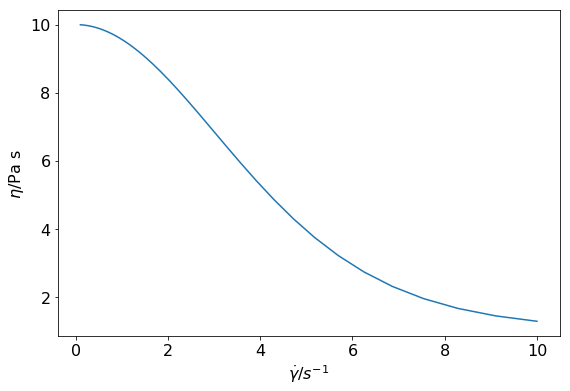

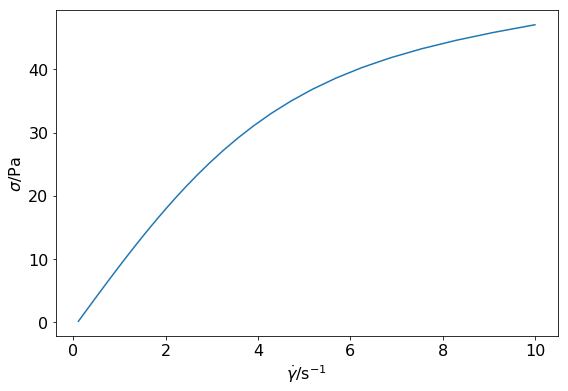

In [29]:
eta_0 = 10 
eta_inf = 1  
GP_b = 10     
n = 10        

slopes = []
slp_pos = []

fig, axCA = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, axCA_tau = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

GP = np.logspace(-1, 1)
y_carr = np.log10(Carreau(GP, eta_0, eta_inf, GP_b, n))
deriv = np.diff(y_carr)
deriv2 = np.diff(y_carr, n=2)
GP = np.log10(GP)

# slp = (y_carr[deriv.argmin() + 1] - y_carr[deriv.argmin()]) / (GP[deriv.argmin() + 1] - GP[deriv.argmin()])
# inter = y_carr[deriv.argmin()] - slp * GP[deriv.argmin()]
# line_x = np.linspace(GP[deriv.argmin() - 5], GP[deriv.argmin() + 7])
# line_y = inter + slp * line_x

GP = 10 ** GP
y_carr = 10 ** y_carr
# line_x = 10 ** line_x
# line_y = 10 ** line_y

axCA.plot(GP, y_carr)
# axCA.plot(line_x, line_y, c='red', linestyle='--')
# axCA.set_xscale('log')
# axCA.set_yscale('log')

linestyles = {'c': 'red', 'linestyle':':'}
textstyles = {'fontsize': 15, 'color':'red'}

#axCA.set_title(r'Fluido Pseudoplástico', loc='right', fontsize='medium')
axCA.set_xlabel('$\dot{\gamma}/s^{-1}$')
axCA.set_ylabel('$\eta/$Pa s')
# axCA.axhline(eta_0, **linestyles)
# axCA.axhline(eta_inf, **linestyles)

# axCA.axvline(GP[deriv2.argmin() - 1], **linestyles)
#axCA.axvline(GP[deriv2.argmax()], **linestyles)

# axCA.text(0.05, eta_0 + 10, r'$\eta_0$', **textstyles)
# axCA.text(500, eta_inf + 0.7, r'$\eta_\infty$', **textstyles)
# axCA.set_ylim((eta_inf*0.9, eta_0*1.5))
# axCA.text(GP[deriv.argmin()], y_carr[deriv.argmin()], r'$n$', **textstyles)
# axCA.text(GP[deriv2.argmin() - 4], np.log10(eta_0)+0.05, r'$\dot{\gamma}_b$', **textstyles)

#fig.savefig('Carreau.png', dpi=600)
fig.savefig(r'..\reologia\Pseudoplastico_eta.pdf')

cumulative = [quad(Carreau, GP[0], GP[i], args=(eta_0, eta_inf, GP_b, n))[0] for i in range(1, len(GP))]
axCA_tau.plot(GP[1:], cumulative)
#axCA_tau.set_title(r'Fluido Pseudoplástico', loc='right', fontsize='medium')
axCA_tau.set_xlabel('$\dot{\gamma}$/s$^{-1}$')
axCA_tau.set_ylabel(r'$\sigma$/Pa')
# axCA_tau.set_xscale('log')
# axCA_tau.set_yscale('log')
fig2.savefig(r'..\reologia\Pseudoplastico_tau.pdf')

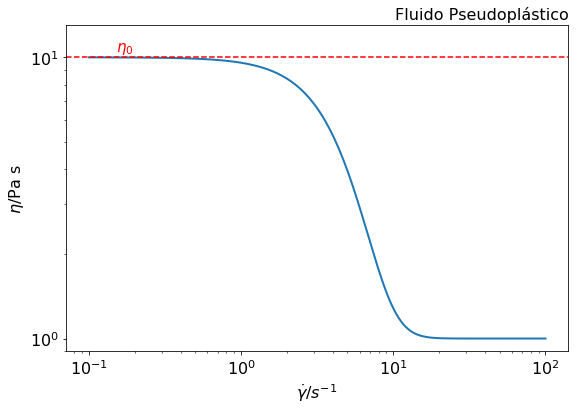

In [30]:
eta_0 = 10 
eta_inf = 1  
GP_b = 10     
n = 10        

slopes = []
slp_pos = []

fig, axCA = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

GP = np.logspace(-1, 2, num=200)
y_carr = np.log10(Carreau(GP, eta_0, eta_inf, GP_b, n))
deriv = np.diff(y_carr)
deriv2 = np.diff(y_carr, n=2)
GP = np.log10(GP)

slp = (y_carr[deriv.argmin() + 1] - y_carr[deriv.argmin()]) / (GP[deriv.argmin() + 1] - GP[deriv.argmin()])
inter = y_carr[deriv.argmin()] - slp * GP[deriv.argmin()]
line_x = np.linspace(GP[deriv.argmin() - 5], GP[deriv.argmin() + 7])
line_y = inter + slp * line_x

slopes.append(slp)

GP = 10 ** GP
y_carr = 10 ** y_carr

axCA.plot(GP, y_carr, linewidth=2)
# axCA.plot(line_x, line_y, c='red', linestyle='--')
axCA.set_xscale('log')
axCA.set_yscale('log')

linestyles = {'c': 'red', 'linestyle':'--'}
textstyles = {'fontsize': 15, 'color':'red'}

axCA.set_title(r'Fluido Pseudoplástico', loc='right', fontsize='medium')
axCA.set_xlabel('$\dot{\gamma}/s^{-1}$')
axCA.set_ylabel('$\eta/$Pa s')
axCA.axhline(eta_0, **linestyles)
# axCA.axhline(eta_inf, **linestyles)
axCA.set_ylim((eta_inf*0.9, eta_0*1.3))

# axCA.axvline(GP[deriv2.argmin() - 1], **linestyles)
#axCA.axvline(GP[deriv2.argmax()], **linestyles)

axCA.text(0.15, eta_0+0.5, r'$\eta_0$', **textstyles)
# axCA.text(40, eta_inf+0.1, r'$\eta_\infty$', **textstyles)
# axCA.text(GP[deriv.argmin()], y_carr[deriv.argmin()], r'$n$', **textstyles)
# axCA.text(GP[deriv2.argmin() - 4], np.log10(eta_0)+0.05, r'$\dot{\gamma}_b$', **textstyles)


fig.savefig(r'..\reologia\Pseudoplastico_loglog.pdf')

In [83]:
integral_q = quad(Carreau, GP[0], GP[-1], args=(eta_0, eta_inf, GP_b, n))
integral_s = simps(y_carr, GP)
print(integral_q, integral_s)

(5297.071310514243, 2.950765065384359e-09) 5296.888676207453


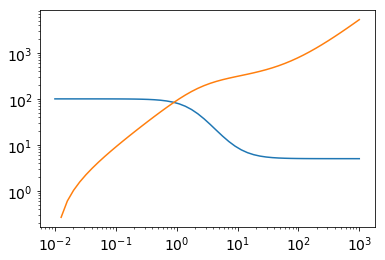

In [92]:

plt.xscale('log')
plt.yscale('log')

In [5]:
import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False, 'text.latex.unicode':True})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

c:\users\karl\anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


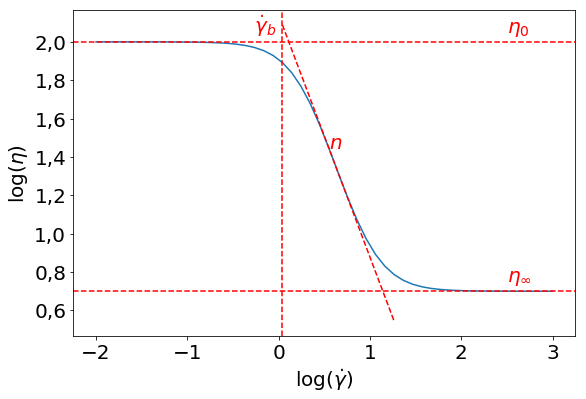

In [20]:
mpl.rcParams.update({'font.size': 20})
eta_0 = 100 
eta_inf = 5  
GP_b = 2     
n = 2        

slopes = []
slp_pos = []

fig, axCA = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

GP = np.logspace(-2, 3)
y_carr = np.log10(Carreau(GP, eta_0, eta_inf, GP_b, n))
deriv = np.diff(y_carr)
deriv2 = np.diff(y_carr, n=2)
GP = np.log10(GP)

slp = (y_carr[deriv.argmin() + 1] - y_carr[deriv.argmin()]) / (GP[deriv.argmin() + 1] - GP[deriv.argmin()])
inter = y_carr[deriv.argmin()] - slp * GP[deriv.argmin()]
line_x = np.linspace(GP[deriv.argmin() - 5], GP[deriv.argmin() + 7])
line_y = inter + slp * line_x

slopes.append(slp)

axCA.plot(GP, y_carr)
axCA.plot(line_x, line_y, c='red', linestyle='--')

linestyles = {'c': 'red', 'linestyle':'--'}
textstyles = {'fontsize': 20, 'color':'red'}

#axCA.set_title(r'Carreau - $n=2, \dot{\gamma}_b=2, \eta_0 = 100, \eta_\infty = 5$', loc='right', fontsize='medium')
axCA.set_xlabel(r'$\log(\dot{\gamma})$')
axCA.set_ylabel(r'$\log(\eta)$')
axCA.axhline(np.log10(eta_0), **linestyles)
axCA.axhline(np.log10(eta_inf), **linestyles)

axCA.axvline(GP[deriv2.argmin() - 1], **linestyles)
#axCA.axvline(GP[deriv2.argmax()], **linestyles)

axCA.text(2.5, np.log10(eta_0)+0.05, r'$\eta_0$', **textstyles)
axCA.text(2.5, np.log10(eta_inf) + 0.05, r'$\eta_\infty$', **textstyles)
axCA.text(GP[deriv.argmin()], y_carr[deriv.argmin()], r'$n$', **textstyles)
axCA.text(GP[deriv2.argmin() - 4], np.log10(eta_0)+0.05, r'$\dot{\gamma}_b$', **textstyles)

fig.savefig(r'..\reologia\Carreau.pdf')
mpl.rcParams.update({'font.size': 14})

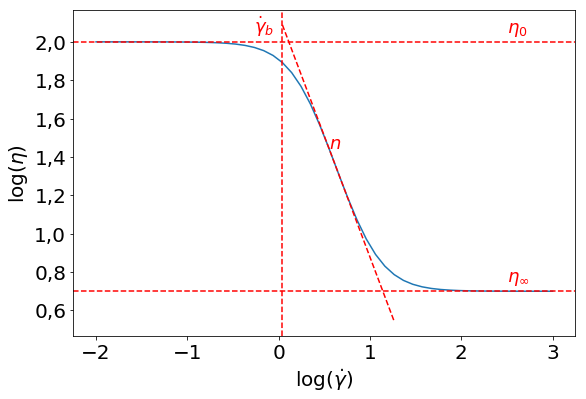

In [19]:
mpl.rcParams.update({'font.size': 20})
eta_0 = 100 
eta_inf = 5  
GP_b = 2     
n = 2        

slopes = []
slp_pos = []

fig, axCR = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

GP = np.logspace(-2, 3)
y_cross = np.log10(Cross(GP, eta_0, eta_inf, GP_b, n))
deriv = np.diff(y_cross)
deriv2 = np.diff(y_cross, n=2)
GP = np.log10(GP)

slp = (y_cross[deriv.argmin() + 1] - y_cross[deriv.argmin()]) / (GP[deriv.argmin() + 1] - GP[deriv.argmin()])
inter = y_cross[deriv.argmin()] - slp * GP[deriv.argmin()]
line_x = np.linspace(GP[deriv.argmin() - 5], GP[deriv.argmin() + 7])
line_y = inter + slp * line_x

slopes.append(slp)

axCR.plot(GP, y_cross)
axCR.plot(line_x, line_y, linestyle='--', c='r')

linestyles = {'c': 'red', 'linestyle':'--'}
textstyles = {'fontsize': 18, 'color':'red'}

#axCR.set_title(r'Cross: $n=2, \dot{\gamma}_b=2, \eta_0 = 100, \eta_\infty = 5$', loc='right', fontsize='medium')
axCR.set_xlabel(r'$\log(\dot{\gamma})$')
axCR.set_ylabel(r'$\log(\eta)$')
axCR.axhline(np.log10(eta_0), **linestyles)
axCR.axhline(np.log10(eta_inf), **linestyles)

axCR.axvline(GP[deriv2.argmin() - 1], **linestyles)
#axCR.axvline(GP[deriv2.argmax()], **linestyles)

axCR.text(2.5, np.log10(eta_0)+0.05, r'$\eta_0$', **textstyles)
axCR.text(2.5, np.log10(eta_inf) + 0.05, r'$\eta_\infty$', **textstyles)
axCR.text(GP[deriv.argmin()], y_cross[deriv.argmin()], r'$n$', **textstyles)
axCR.text(GP[deriv2.argmin()-4], np.log10(eta_0)+0.05, r'$\dot{\gamma}_b$', **textstyles)

fig.savefig(r'..\reologia\Cross.pdf')
mpl.rcParams.update({'font.size': 14})

# Reologia oscilatória

## Definição dos modelos

In [13]:
def maxwell_elast(w, G0, lambda1):
    return G0 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2)
    
def maxwell_visc(w, G0, lambda1):
    return G0 * (lambda1 * w)      / (1 + (lambda1 * w) ** 2)

############################

def oldroydB_elast(w, Gn0, tau_r):
    return Gn0 * w ** 2 * tau_r ** 2 / (1 + w ** 2 * tau_r ** 2)  

def oldroydB_visc(w, Gn0, tau_r, eta_inf):
    return Gn0 * w * tau_r / (1 + w ** 2 * tau_r ** 2) + eta_inf * w    # correto! Tese Calabrese

###############################

def jeffreys_elast(w, G0, lambda0, lambdaj):
    return ((G0 * lambda0 * (lambda0 - lambdaj) * w ** 2 
           / (1 + lambda0 ** 2 * w ** 2)))
    
    
def jeffreys_visc(w, G0, lambda0, lambdaj):
    return (G0 * lambda0 * (1 + lambda0 * lambdaj * w ** 2) 
                        * w / (1 + lambda0 ** 2 * w ** 2))
    
###############################

def two_mode_elast(w, G01, G02, lambda1, lambda2):
    return (( G01 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2) ) 
         + ( G02 * (lambda2 * w) ** 2 / (1 + (lambda2 * w) ** 2) ))
    
def two_mode_visc(w, G01, G02, lambda1, lambda2):
    return (( G01 * (lambda1 * w) / (1 + (lambda1 * w) ** 2) ) 
         + ( G02 * (lambda2 * w) / (1 + (lambda2 * w) ** 2) ))
    
###############################


\frac{G \omega^{2} \tau_{0} \left(\tau_{0} - \tau_{j}\right)}{\omega^{2} \tau_{0}^{2} + 1}
\frac{G \omega \tau_{0} \left(\omega^{2} \tau_{0} \tau_{j} + 1\right)}{\omega^{2} \tau_{0}^{2} + 1}


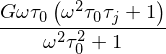

In [118]:
import sympy as sp
sp.init_printing()
G0, lambda0, lambdaj, w = sp.symbols(r'G tau_0 tau_j omega')

jeff_elast = ((G0 * lambda0 * (lambda0 - lambdaj) * w ** 2 
           / (1 + lambda0 ** 2 * w ** 2)))
jeff_visc = (G0 * lambda0 * (1 + lambda0 * lambdaj * w ** 2) 
                        * w / (1 + lambda0 ** 2 * w ** 2))

print(sp.latex(jeff_elast))
print(sp.latex(jeff_visc))
#jeff_elast
jeff_visc

In [14]:
w = np.logspace(-2, 1, num=100) # Frequência, omega

# Módulos platô

G0_o   = 10 # Oldroyd
G0_j   = 10 # Jeffreys
G01_tm = 10 # Two Mode
G02_tm = 15 # Two Mode
G0     = 10 # Maxwell

# Tempos de relaxação

tr_o    = 10 # Oldroyd
tr1_j   = 35 # Jeffreys  tr1_j > tr2_j, sempre!
tr2_j   = 0.1  # Jeffreys
tr1_t   = 1  # Two Mode
tr2_t   = 5  # Two Mode
tr      = 10 # Maxwell

# Outros

eta_inf = 2 # Oldroyd

y1_maxwell = maxwell_elast(w, G0, tr)
y2_maxwell = maxwell_visc(w, G0, tr)
y1_oldroyd = oldroydB_elast(w, G0_o, tr_o)
y2_oldroyd = oldroydB_visc(w, G0_o, tr_o, eta_inf)
y1_jeffreys = jeffreys_elast(w, G0_j, tr1_j, tr2_j)
y2_jeffreys = jeffreys_visc(w, G0_j, tr1_j, tr2_j)
y1_twomode = two_mode_elast(w, G01_tm, G02_tm, tr1_t, tr2_t)
y2_twomode = two_mode_visc(w, G01_tm, G02_tm, tr1_t, tr2_t)

## Plots comparativos

In [15]:
# Estilos para G' e G'':
g1style = {'linewidth':3, 'linestyle':'-'}
g2style = {'linewidth':3, 'linestyle':'-.'}

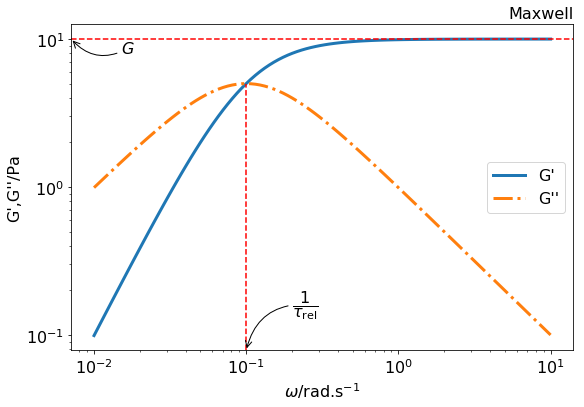

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))

ax.plot(w, y1_maxwell, **g1style, label="G'")
ax.plot(w, y2_maxwell, **g2style, label="G''")
ax.set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax.set_title('Maxwell', loc='right', fontsize='medium')

# Determine Crossing point
proximities = abs(y1_maxwell-y2_maxwell)
x_realcross = w[proximities.argmin()]
y_realcross = y1_maxwell[proximities.argmin()]
# Determine the crossing point in terms of the graph
ymin, ymax = ax.get_ylim()
ymin, ymax = np.log10(ymin), np.log10(ymax)
span = ymax - ymin
prop = (np.log10(y_realcross) + (-ymin))/span

ax.axvline(x=1/tr, ymax=prop, linestyle='--', color='r')
ax.axhline(y=G0, linestyle='--', color='r')

ax.annotate(text=r'$\dfrac{1}{\tau_\mathrm{rel}}$',
             xy=(x_realcross, 10**ymin),
             xytext=(x_realcross + 0.1, 0.15),
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=+.4' , 'color':'k'}, fontsize=16)

ax.annotate(text=r'$G$',
             xy=(ax.get_xlim()[0], 10),
             xytext=(0.015, 8),
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=-.4' , 'color':'k'}, fontsize=16)

ax.legend()

fig.savefig(r'..\reologia\modelo_maxwell.pdf')

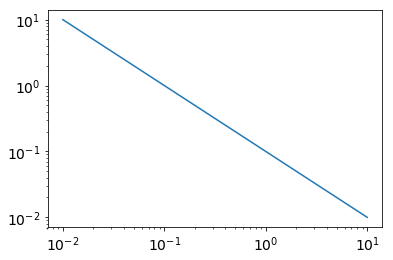

In [104]:
plt.plot(w, y2_maxwell/y1_maxwell)
plt.xscale('log')
plt.yscale('log')

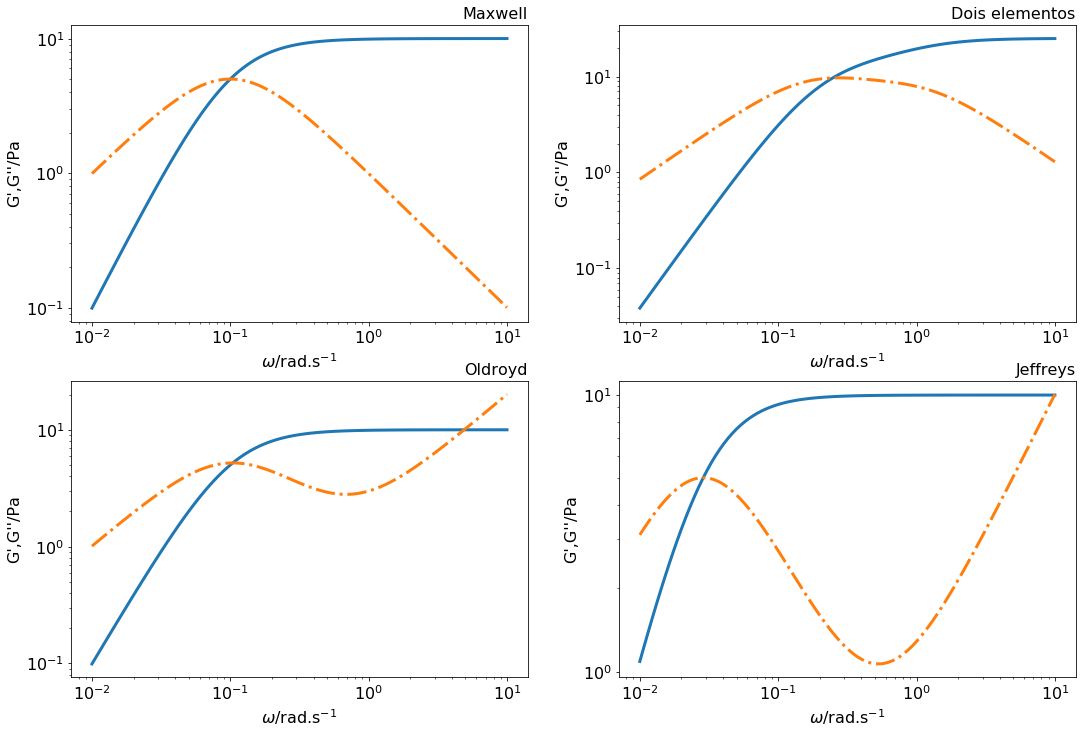

In [101]:
mpl.rcParams.update({'font.size': 16, 'text.usetex':False})

fig, ax = plt.subplots(2, 2, figsize=((18,12)))

ax = ax.flatten()

ax[0].plot(w, y1_maxwell, **g1style)
ax[0].plot(w, y2_maxwell, **g2style)
ax[0].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[0].set_title('Maxwell', loc='right', fontsize='medium')

ax[1].plot(w, y1_twomode, **g1style)
ax[1].plot(w, y2_twomode, **g2style)
ax[1].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[1].set_title('Dois elementos', loc='right', fontsize='medium')

ax[2].plot(w, y1_oldroyd, **g1style)
ax[2].plot(w, y2_oldroyd, **g2style)
ax[2].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[2].set_title('Oldroyd', loc='right', fontsize='medium')

ax[3].plot(w, y1_jeffreys, **g1style)
ax[3].plot(w, y2_jeffreys, **g2style)
ax[3].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[3].set_title('Jeffreys', loc='right', fontsize='medium')



#fig.tight_layout()
fig.savefig(r'D:\Google Drive\Doutorado\Tese\imagens\reologia\modelos_comparativo.pdf')
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

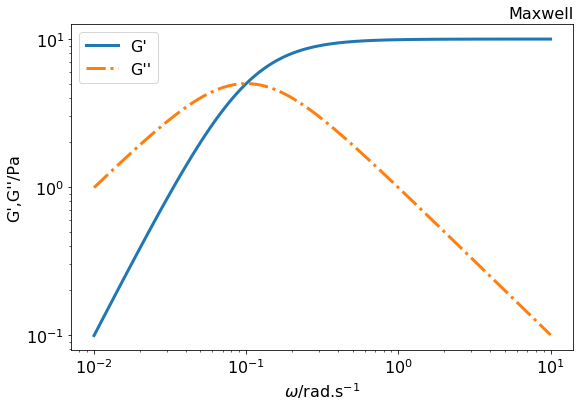

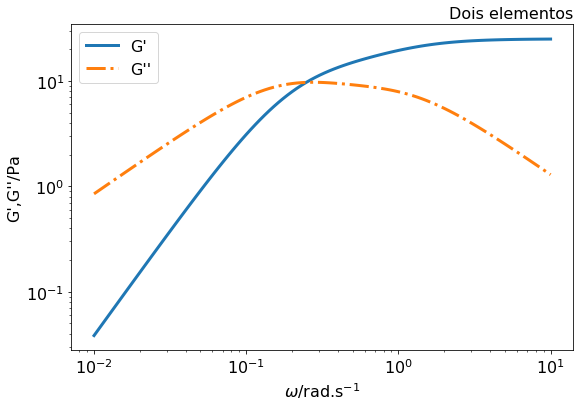

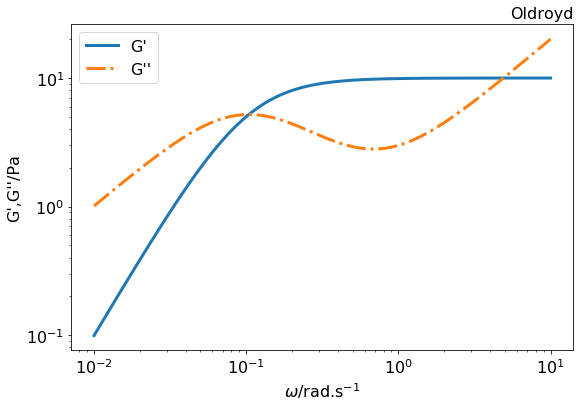

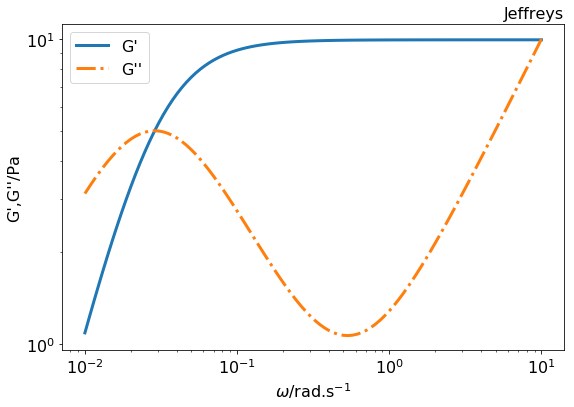

In [126]:
mpl.rcParams.update({'font.size': 16, 'text.usetex':False})

fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))
fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))
fig3, ax3 = plt.subplots(1, 1, figsize=(9,6))
fig4, ax4 = plt.subplots(1, 1, figsize=(9,6))

ax = [ax1, ax2, ax3, ax4]
#ax = ax.flatten()

ax[0].plot(w, y1_maxwell, **g1style, label="G'")
ax[0].plot(w, y2_maxwell, **g2style, label="G''")
ax[0].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[0].set_title('Maxwell', loc='right', fontsize='medium')

ax[1].plot(w, y1_twomode, **g1style, label="G'")
ax[1].plot(w, y2_twomode, **g2style, label="G''")
ax[1].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[1].set_title('Dois elementos', loc='right', fontsize='medium')

ax[2].plot(w, y1_oldroyd, **g1style, label="G'")
ax[2].plot(w, y2_oldroyd, **g2style, label="G''")
ax[2].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[2].set_title('Oldroyd', loc='right', fontsize='medium')

ax[3].plot(w, y1_jeffreys, **g1style, label="G'")
ax[3].plot(w, y2_jeffreys, **g2style, label="G''")
ax[3].set(xlabel=r'$\omega$/rad.s$^{-1}$', ylabel=r"G',G''/Pa", xscale='log', yscale='log',)
ax[3].set_title('Jeffreys', loc='right', fontsize='medium')

for a in ax:
    a.legend()

#fig.tight_layout()
#fig.savefig(r'D:\Google Drive\Doutorado\Tese\imagens\reologia\modelos_comparativo.pdf')
fig1.savefig(r'D:\Google Drive\Doutorado\Tese\imagens\reologia\modelos_comparativo_max.pdf')
fig2.savefig(r'D:\Google Drive\Doutorado\Tese\imagens\reologia\modelos_comparativo_doismodos.pdf')
fig3.savefig(r'D:\Google Drive\Doutorado\Tese\imagens\reologia\modelos_comparativo_oldroyd.pdf')
fig4.savefig(r'D:\Google Drive\Doutorado\Tese\imagens\reologia\modelos_comparativo_jeffreys.pdf')
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})